In [6]:
import json
import pandas as pd

In [7]:
fileformat = '/home/echeng/llm_compositionality/results_new/EleutherAI_pythia-{}-deduped/ids_dataset_{}_step_{}.json' # size dataset step
file14m = '/home/echeng/llm_compositionality/results_new/EleutherAI_pythia-14m/ids_dataset_{}_step_143000.json' # size

In [8]:
SIZES = ['14m', '70m', '160m', '2.8b', '12b']
CKPTS = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 
         1000, 2000, 3000, 4000, 8000, 13000, 23000 ,32000, 33000, 43000,
         53000, 63000, 64000, 73000, 83000, 93000, 103000, 113000, 123000, 133000,
         143000]
SCALING_SIZES = ['410m', '1.4b', '6.9b']
DATASETS = [1, 2, 3, 4]
DATASET_COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


HIDDEN_DIMS = {
    '14m': 128, 
    '70m': 512, 
    '160m': 768, 
    '410m': 1024,
    '1.4b': 2048,
    # '2.8b': 2560, 
    '6.9b': 4096,
    '12b': 5120,
}

MODES = ['sane', 'shuffled']

In [5]:
np.mean(results_df[(results_df['model']=='2.8b') & (results_df['mode']=='sane') & (results_df['words_coupled']==1)]['twonn_mean'])

NameError: name 'np' is not defined

In [9]:
def load_data(size, dataset, step=None):
    filepath = fileformat.format(size, dataset, step) if size != '14m' else file14m.format(dataset, 143000)
    with open(filepath , 'r') as f:
        data = json.load(f)

    return data

In [23]:
results = load_data('70m', 1, 143000)

RESULTS = []
for model in HIDDEN_DIMS:
    for ds in DATASETS:
        if model in SCALING_SIZES: 
            steps = CKPTS
        else:
            steps = [143000]
        for step in steps:
            try:
                results = load_data(model, ds, step)
            except FileNotFoundError:
                continue
            for mode in MODES:
                results_ = pd.DataFrame(results[mode])
                results_['mode'] = mode
                results_['words_coupled'] = ds
                results_['step'] = step
                results_['D'] = HIDDEN_DIMS[model]
                results_['model'] = model
                results_['layer'] = list(range(len(results_)))
                RESULTS.append(results_)
                
results_df = pd.concat(RESULTS)

In [131]:
results_df

,pca_mean,pca_std,pr_mean,pr_std,twonn_mean,twonn_std,mle_mean,mle_std,mode,words_coupled,step,D,model,layer
0,53.4,0.489898,10.023844,0.139006,16.506662,0.210626,15.870417,0.066525,sane,1,143000,128,14m,0
1,48.8,0.400000,2.332995,0.021067,16.656263,0.201438,15.666395,0.060086,sane,1,143000,128,14m,1
2,15.8,0.400000,1.148035,0.002858,14.361790,0.162540,12.535373,0.079673,sane,1,143000,128,14m,2
3,58.6,0.489898,2.288972,0.020985,19.096650,0.118006,18.566925,0.076999,sane,1,143000,128,14m,3
4,85.6,0.489898,7.463161,0.174198,22.691318,0.112240,21.408925,0.071060,sane,1,143000,128,14m,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,2787.6,1.019804,27.104467,0.513366,18.497438,0.068722,17.285963,0.086387,shuffled,4,143000,4096,6.9b,27
28,2779.4,1.019804,26.476945,0.463638,18.891563,0.075334,17.933800,0.090196,shuffled,4,143000,4096,6.9b,28
29,2758.6,1.019804,24.860463,0.393986,19.019661,0.102981,18.241496,0.087787,shuffled,4,143000,4096,6.9b,29
30,2683.2,1.166190,19.180917,0.277585,19.054071,0.111752,18.606556,0.064694,shuffled,4,143000,4096,6.9b,30


In [13]:
results_df = pd.read_csv('emily_id_results_all.csv').drop(columns=['Unnamed: 0'])

In [25]:
results_df.to_csv('emily_id_results_all.csv')

### THOMAS PLOT PCA vs HIDDEN D

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


  model   mle_mean    pr_mean    pr_std   mle_std
              mean       mean  <lambda>  <lambda>
0  1.4b  30.127558  13.259112  0.897218  0.540092
1   12b  32.913033  24.573508  1.941501  0.591318
2   14m  17.492031   8.532429  0.300826  0.175635
3  160m  34.352228  12.256183  0.464328  0.393298
4  2.8b  54.957760  18.640147  1.631016  1.286429
5  410m  27.501729  16.225568  0.941188  0.420980
6  6.9b  32.709907  24.004944  1.795589  0.876697
7   70m  20.495744   7.118602  0.360732  0.237999
  model   mle_mean    pr_mean    pr_std   mle_std
              mean       mean  <lambda>  <lambda>
0  1.4b  24.625760  12.758691  0.766745  0.360415
1   12b  25.980083  23.788951  1.120433  0.406561
2   14m  15.914362   8.561145  0.437705  0.141813
3  160m  27.685899  12.019908  0.381644  0.292711
4  2.8b  45.847648  18.044529  1.260103  0.991936
5  410m  23.103376  15.942616  0.752184  0.345880
6  6.9b  26.014748  22.977776  1.293716  0.423394
7   70m  18.533698   7.010878  0.260655  0.204413


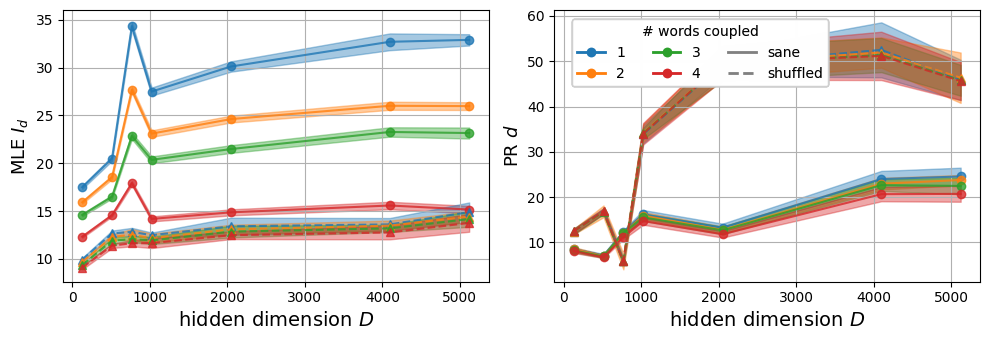

In [136]:
# Take mean over layers.

fig, axs = plt.subplots(1, 2, figsize=(10, 3.5))

# Make figure
Ds = [HIDDEN_DIMS[model] for model in HIDDEN_DIMS]

for i, mode in enumerate(MODES):
    for ds in DATASETS:
        last_ckpt_df = results_df[(results_df['step']==143000) & (results_df['mode']==mode)]
        last_ckpt_df = last_ckpt_df[last_ckpt_df['words_coupled']==ds]

        # Mean
        agg_std = lambda x: np.sqrt(np.sum([x_**2 for x_ in x]))
        last_ckpt_mean = last_ckpt_df[['model', 'mle_mean', 'pr_mean']]
        last_ckpt_std = last_ckpt_df[['model', 'pr_std', 'mle_std']]
        means_df = last_ckpt_mean.groupby('model').agg(['mean'])
        std_df = last_ckpt_std.groupby('model').agg([agg_std])
        means_df = means_df.merge(std_df, on='model')
        means_df = means_df.reset_index()
        print(means_df)
        # Plot one line per datas
        for j, method in enumerate(['mle', 'pr']):
            ys = np.array([means_df[means_df['model']==model][(f'{method}_mean','mean')] for model in HIDDEN_DIMS])[:,0]
            ystd = np.array([means_df[means_df['model']==model][(f'{method}_std','<lambda>')] for model in HIDDEN_DIMS])[:,0]
            
            axs[j].plot(
                Ds, 
                ys, 
                label=f'{ds}',
                linestyle='--' if mode == 'shuffled' else None,
                marker='o' if mode == 'sane' else '^',
                alpha=0.8,
                color=DATASET_COLORS[ds-1]
            )
            axs[j].fill_between(Ds, ys - ystd, ys + ystd, alpha=0.4, color=DATASET_COLORS[ds-1])
            if method == 'mle':
                axs[j].set_ylabel(r'MLE $I_d$', fontsize=13)
            else:
                axs[j].set_ylabel(r'PR $d$', fontsize=13)

            axs[j].set_xlabel(r'hidden dimension $D$', fontsize=14)
            axs[j].grid(True)
            # axs[j].set_yticklabels(axs[j].get_yticklabels(), fontsize=10)
            # axs[j].set_xticklabels(axs[j].get_xticklabels(), fontsize=10)

        # Custom legend handles for both subplots
        custom_lines = [Line2D([0], [0], color=color, marker='o', lw=2) for color in DATASET_COLORS] + \
            [Line2D([0], [0], color='gray', lw=2), Line2D([0], [0], color='gray', linestyle='--', lw=2)]
        
        fig.legend(custom_lines, 
                   [1, 2, 3, 4, 'sane', 'shuffled'], 
                   loc='upper center', ncol=3, title='# words coupled', bbox_to_anchor=(0.705,0.95))
        fig.tight_layout()

for ext in ['svg', 'png', 'pdf']:
    fig.savefig(f'/home/echeng/llm_compositionality/results/plots/neurips_plots/id_model_size_appendix.{ext}')

## Thomas plot ID over layers

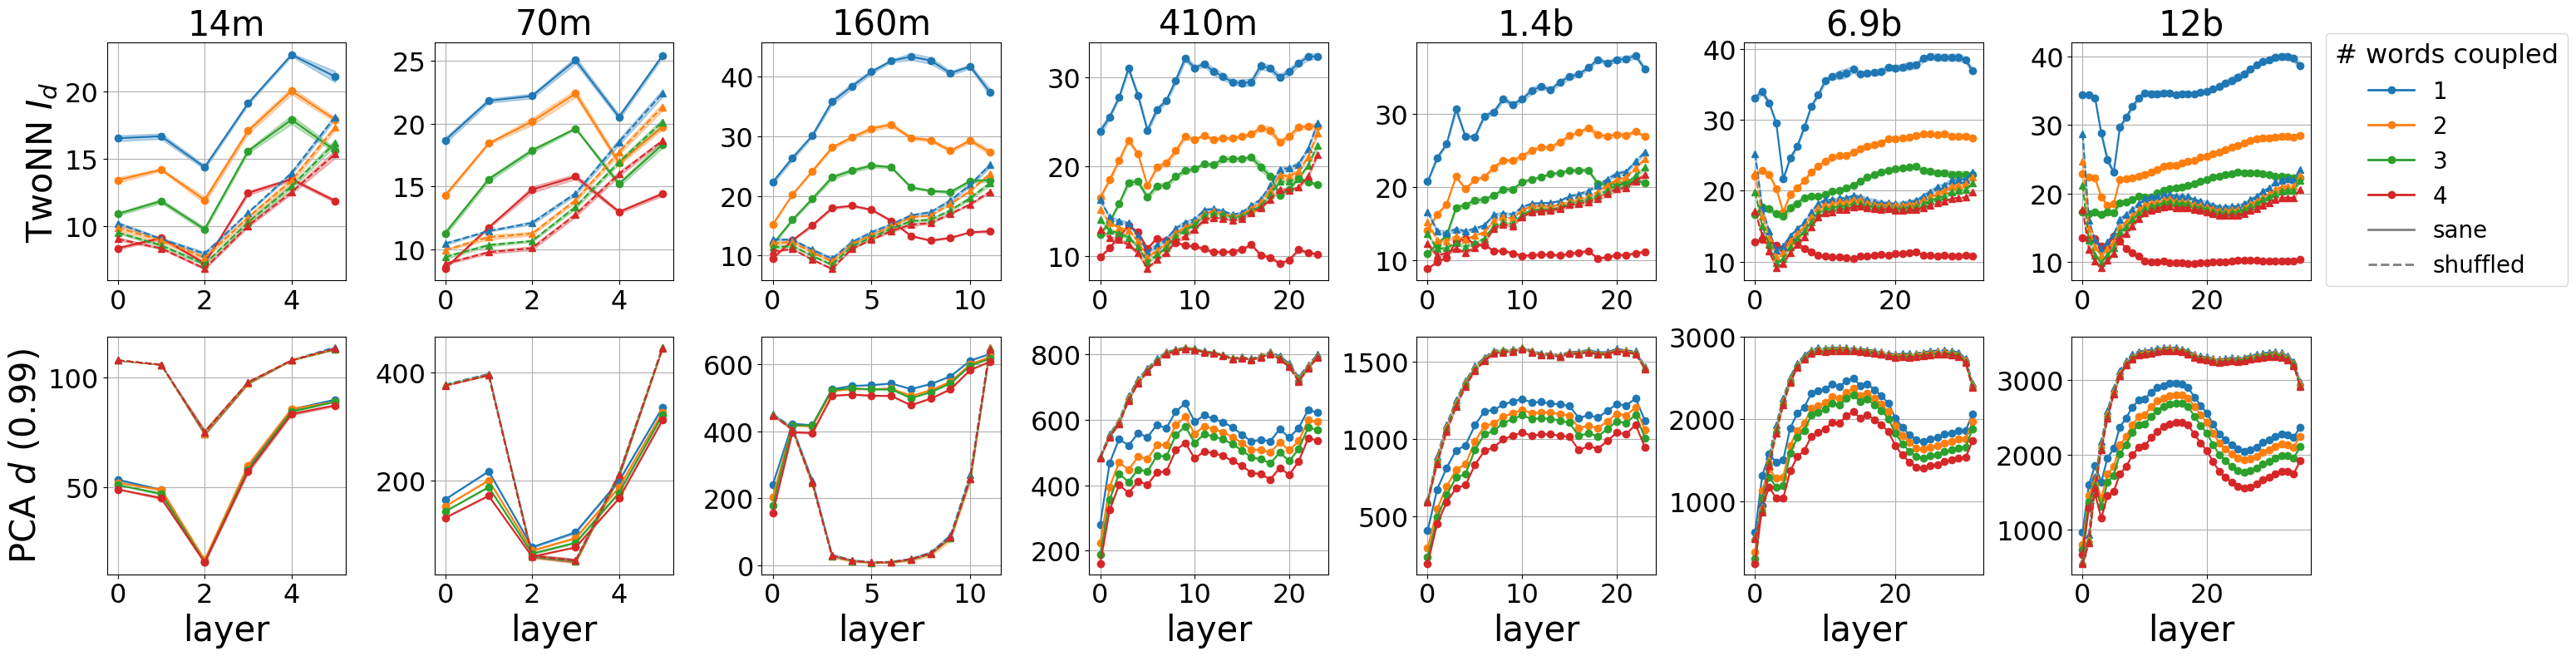

In [37]:
# sizes = SIZES 
sizes = list(HIDDEN_DIMS.keys())

fig, axs = plt.subplots(2, len(sizes), figsize=(4 * len(sizes), 8))

for i, method in enumerate(['twonn', 'pca']):
    for j, model in enumerate(sizes):
        # plot over layers
        ax = axs[i][j]

        # first get the x and y and std for sane
        model_df = results_df[(results_df['model']==model) & (results_df['step']==143000)]

        for mode in ['sane', 'shuffled']:
            setting_df = model_df[model_df['mode'] == mode]

            for ds in DATASETS:
                df = setting_df[setting_df['words_coupled']==ds]
                ax.plot(
                    df['layer'], 
                    df[f'{method}_mean'], 
                    color=DATASET_COLORS[ds-1], 
                    marker='o' if mode == 'sane' else '^',
                    linestyle='--' if mode == 'shuffled' else None,
                    markersize=6
                )
                ax.fill_between(df['layer'], 
                    df[f'{method}_mean'] - df[f'{method}_std'],
                    df[f'{method}_mean'] + df[f'{method}_std'],
                    alpha=0.3,
                    color=DATASET_COLORS[ds-1]
                               )
        # ax.set_xlim([0, len(df['layer'])])
        
        # if i == 0:
            # ax.set_ylim([5, 41])
        # else:
            # ax.set_ylim([0, 3000])
        if i == 0:
            ax.set_title(model, fontsize=30)
        ax.grid(True)
        # ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
        ax.tick_params(axis='x', labelsize=23)
        ax.tick_params(axis='y', labelsize=23)
        if i == 1: 
            ax.set_xlabel('layer', fontsize=30)

        if j == 0:
            if i == 0:
                ax.set_ylabel(r'TwoNN $I_d$', fontsize=30)
            else:
                ax.set_ylabel(r'PCA $d$ (0.99)', fontsize=30)

# Custom legend handles for both subplots
custom_lines = [Line2D([0], [0], color=color, marker='o', lw=2) for color in DATASET_COLORS] + \
    [Line2D([0], [0], color='gray', lw=2), Line2D([0], [0], color='gray', linestyle='--', lw=2)]

fig.legend(custom_lines, 
           [1, 2, 3, 4, 'sane', 'shuffled'], 
           ncol=1, title='# words coupled', bbox_to_anchor=(1.11, 0.96), fontsize=20, title_fontsize=23)
fig.tight_layout()

for ext in ['svg', 'png', 'pdf']:
    fig.savefig(f'/home/echeng/llm_compositionality/results/plots/neurips_plots/nonlinear_linear_id_app.{ext}', bbox_inches='tight')